In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd

### Review of lecture 14

In lecture 14 we learned:

1) About filtering with Pandas

2) How to create more line, pie, and bar graphs with matplotlib 

3) About the composition of the sun, the solar system, and the Earth.

### In this lecture we will:
1)  Learn how to plot  histograms and cumulative distributions

2) Learn how to get lists of random numbers  

3)  Learn about the topography of the Earth (hypsometric curve)


### The hypsometric curve for the Earth

The hypsometric  curve for the Earth was very important in that it demonstrated that the Earth's crust comes in two flavors:  continental and oceanic.  

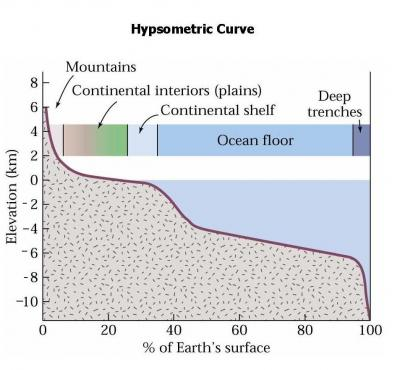

In [2]:
Image(filename='Figures/hypsometric.v2_400.jpg')

_Hypsometric curve for the Earth.  The x-axis is the percentage of Earth's surface that falls above the elevation on the y-axis.  For example, ~30% of the Earth's surface is above  sea level.   [Figure from  this web site:  http://serc.carleton.edu/mathyouneed/hypsometric/index.html]_.

The insight from the hypsometric curve is that there are two plateaus in crustal elevations with the continents above sea level but  another large fraction of crust below sea level. These are the two 'flavors' of continental and oceanic crust.  

Oceanic crust must be denser than continental crust - that is why it "floats" lower which is  the basis for _isostacy_. [For more on isostacy, see this link: http://web.ics.purdue.edu/~ecalais/teaching/eas450/Gravity5.pdf.]

Today we will recreate a similar plot from our knowledge of the Earth's topography.  Nowadays, we can measure the topography from satellites, so there is extensive coverage over the surface of the Earth.  

Here is a map projection of the Earth's topography.    In the coming weeks, we will learn how to make this plot, but for now, let's just take a look at it. Notice the mountain ranges including the  ridge crests.   

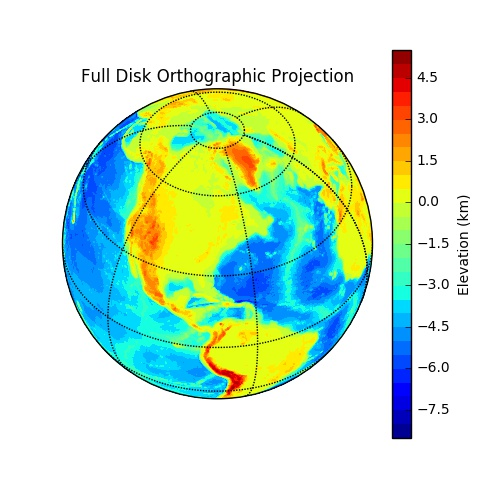

In [3]:
Image(filename='Figures/etopo20.jpg')

We are interested in  the hypsometric curve, which is the distribution of elevations.  One very straight forward way to do this is to look at the elevation data as a histogram.  A histogram breaks the data into 'bins', sums the data points within each bin and then plots the totals in each bin as a series of bars. 


To plot a histogram, we must first read in the data that were plotted on the map. We'll use a set of elevation data associated with a latitude/longitude grid around the earth called ETOPO20 (20-minute resolution).  

The file is a compressed version (gnu-zip or gz) of the data and can be read directly using NumPy's **loadtxt( )** function:

In [4]:
topo=np.loadtxt('Datasets/Etopo/etopo20data.gz')

It is usually a good idea to take a peek at the data before you try plotting them, so let's just look at the first 10 cells in the array 'topo': 

In [5]:
print (topo[0:10])


[[ 2804.      2804.      2804.     ...,  2804.      2804.      2804.    ]
 [ 2831.      2831.      2831.     ...,  2831.      2831.      2831.    ]
 [ 2808.      2808.      2808.     ...,  2808.      2808.      2808.    ]
 ..., 
 [ 2899.      2899.      2899.     ...,  2899.      2899.      2899.    ]
 [ 2868.75    2868.75    2868.75   ...,  2868.75    2868.75    2868.75  ]
 [ 2785.5     2785.5     2795.3125 ...,  2785.5     2785.5     2785.5   ]]


Our original map was in kilometers, whereas these data are in meters. We can convert the elevations to km by dividing _topo_ by 1000. 

In [6]:
topo_km=topo/1000. # convert to kilometers
print (topo_km[0:10])

[[ 2.804      2.804      2.804     ...,  2.804      2.804      2.804    ]
 [ 2.831      2.831      2.831     ...,  2.831      2.831      2.831    ]
 [ 2.808      2.808      2.808     ...,  2.808      2.808      2.808    ]
 ..., 
 [ 2.899      2.899      2.899     ...,  2.899      2.899      2.899    ]
 [ 2.86875    2.86875    2.86875   ...,  2.86875    2.86875    2.86875  ]
 [ 2.7855     2.7855     2.7953125 ...,  2.7855     2.7855     2.7855   ]]


It also looks like the elevations are in many rows that pair with the latitude and longitude data stored in etopo20lats.gz and etopo20lons.gz. For now, we're only concerned with the distribution of the topography, so we can "flatten" the data into a single row. We can do that with the NumPy **flatten( )** method:  

In [7]:
flat_topo=topo_km.flatten()
print (flat_topo)

[ 2.804   2.804   2.804  ..., -4.2915 -4.2915 -4.2915]


Now we can plot the data as a histogram using **plt.hist( )**. (Try **help(plt.hist)** for more info.)

**plt.hist( )** takes some keyword arguments, and we will use **bins** and **normed** to set the number of bins to 20 and normalize the plot to sum to unity.  

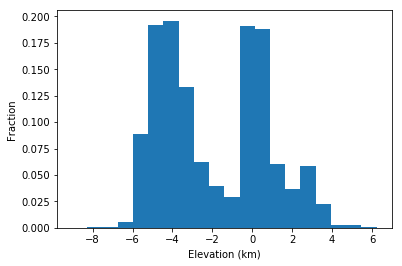

In [8]:
plt.hist(flat_topo,bins=20,normed=True)
plt.xlabel("Elevation (km)")
plt.ylabel("Fraction");

There are two peaks, one near sea-level and one below sea-level (the ocean basins). We saw this same pattern in the hypsometric curve. 

The hypsometric curve is a kind of _cumulative distribution function (CDF)_ whereby instead of binning the data and finding the frequency, as in a histogram, we find the cumulative distribution. For a point on the CDF, the value of y represents the percentage of Earth's surface with an elevation lower than the elevation at the corresponding value of x.

Let's create a CDF from our topographic data.  To do this, we must sort the data by elevation.  
We use the **sorted( )** function on our **flat_topo** array.  

In [9]:
topo_sorted=sorted(flat_topo) # sort the data in increasing numbers

For the y axis we need the percentage of Earth's surface that lies below a given elevation.  For this, we just need an array with $N$ values equally spaced between 0 and 100.  This sounds like a job for **np.linspace( )** [Lecture 7].  

In [10]:
percent=np.linspace(0,100,len(topo_sorted))

And now for the plot:

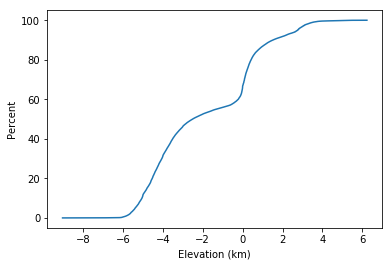

In [11]:
plt.plot(topo_sorted,percent)
plt.xlabel('Elevation (km)')
plt.ylabel('Percent');

You can now see that the CDF is just a  hypsometric curve on its side. Once we plot the data with the percent on the x-axis and the elevation on the y-axis, we'll get closer to our hypsometric curve:  

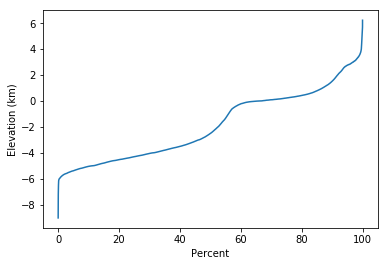

In [12]:
plt.plot(percent,topo_sorted)
plt.xlabel('Percent')
plt.ylabel('Elevation (km)');

Our CDF is still different from the hypsometric curve we saw at the beginning of class.  

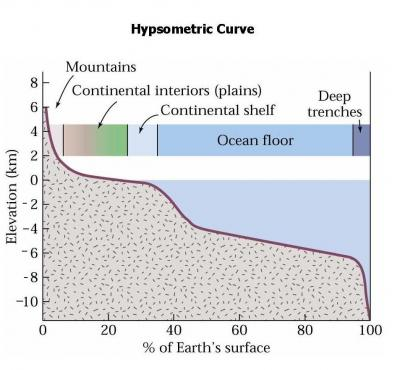

In [13]:
Image(filename='Figures/hypsometric.v2_400.jpg')

Our CDF represents the percentage (x-axis) of Earth's surface that is LOWER than the corresponding elevation (y-axis), whereas the hypsometric curve represents the percentage of Earth's surface GREATER than the corresponding elevation.  So let's start over and sort the data by decreasing values instead of increasing.  We do that with the keyword argument **reverse** in the function **sorted( )**.   

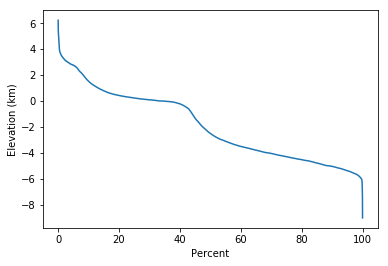

In [14]:
topo_sorted=sorted(flat_topo,reverse=True) # sort the data by decreasing numbers
percent=np.linspace(0,100,len(topo_sorted)) # and percent just like before
plt.plot(percent,topo_sorted) # plot
plt.xlabel('Percent')  # label
plt.ylabel('Elevation (km)');


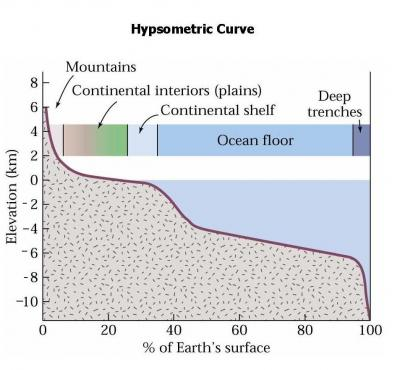

In [15]:
Image(filename='Figures/hypsometric.v2_400.jpg',width=600)

NOW we are getting somewhere! But, the dimensions of the plot are different. We can change this by using the **plt.figure( )** function, which as we already learned takes a tuple of the desired dimensions and a figure number as arguments. Here we use 1 as the figure number and make a 6 x 5 figure

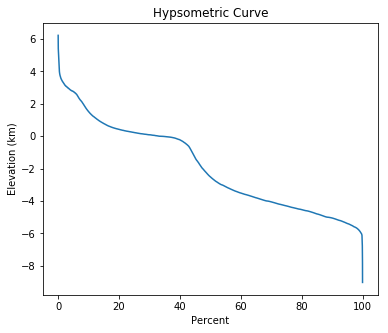

In [16]:
plt.figure(1,(6,5)) #figure number and dimensions
plt.plot(percent,topo_sorted)
plt.ylabel('Elevation (km)')
plt.title("Hypsometric Curve")
plt.xlabel("Percent");

We're close but not exactly right.  

It turns out that the data is binned in 20 minute grids of latitude and longitude.  The problem with that approach is evident in this figure. On the left is the way our data are constructed with equal weight at every line of latitude.  On the right we plotted the data in a polar projection, with the North pole in the center.  You can see that there is a lot less surface area per line of latitude near the north pole than at the equator!

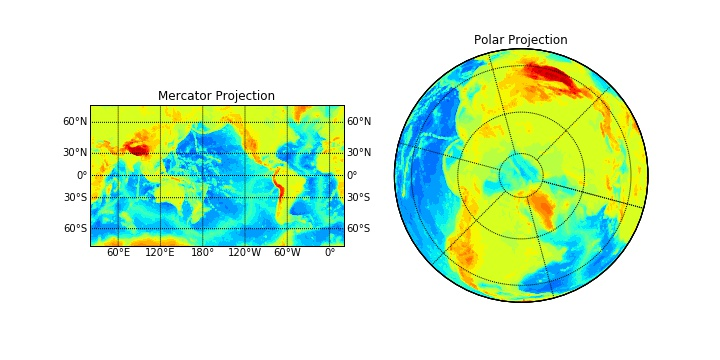

In [17]:
Image(filename='Figures/etopo20_polar.jpg')

Because the area of one cell at the pole is MUCH less than that for an equatorial cell,  we have to normalize the number of data points in each cell by its surface area.   We could do this by re-sampling each grid proportional to the surface area it covers. Each point would then represent the same percentage of Earth's surface. We would sample the most from the equator and the least from the poles.

First, we'll need to know how many cells are in each latitudinal bin.  Let's use the NumPy **shape** attribute for that: 

In [18]:
topo.shape

(540, 1081)

This means that there are 540 latitudinal bins with 1081 longitudinal cells in each latitude bin. 

Let's read in the latitude/longitude data files that defines our grid and take a look at them.


In [19]:
lats=np.loadtxt('Datasets/Etopo/etopo20lats.gz') #read in the data
lons=np.loadtxt('Datasets/Etopo/etopo20lons.gz')
print (lats[0:20])
print (lons[0:20])
print (lats.shape)
print (lons.shape)

[-89.8333333 -89.5       -89.1666667 -88.8333334 -88.5000001 -88.1666668
 -87.8333335 -87.5000002 -87.1666669 -86.8333336 -86.5000003 -86.166667
 -85.8333337 -85.5000004 -85.1666671 -84.8333338 -84.5000005 -84.1666672
 -83.8333339 -83.5000006]
[ 20.1666667  20.5        20.8333333  21.1666666  21.4999999  21.8333332
  22.1666665  22.4999998  22.8333331  23.1666664  23.4999997  23.833333
  24.1666663  24.4999996  24.8333329  25.1666662  25.4999995  25.8333328
  26.1666661  26.4999994]
(540,)
(1081,)


There are 540 latitudinal bins and for each latitude there are 1081 longitudinal bins.  
The  trick here is that the surface area of a lat/lon box varies as the cosine of the latitude ($\phi$):

$$ S = \int_{\phi_1}^{\phi_2} R\bigl( \int_{\lambda_1}^{\lambda_2} R \cos \phi d\lambda\bigr) d\phi.$$




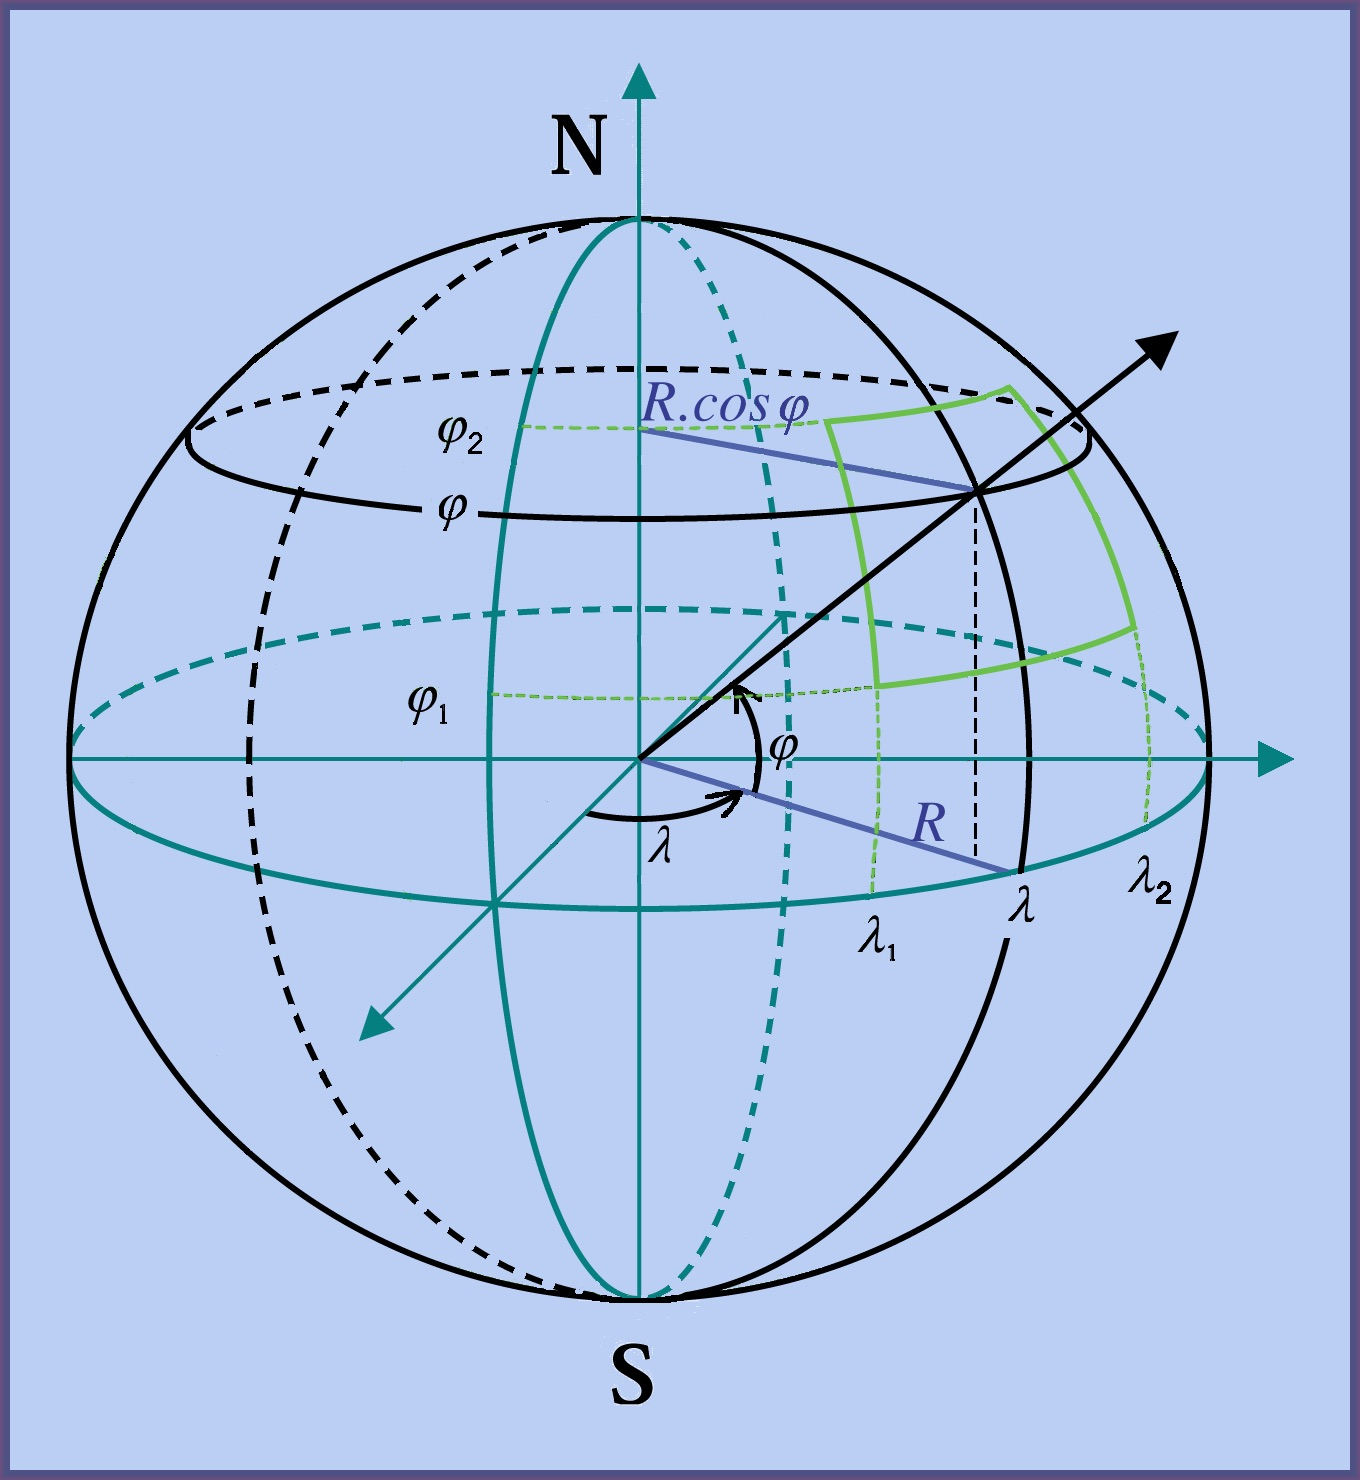

In [20]:
Image(filename='Figures/sphere.jpg',width=500)

_[Figure from https://badc.nerc.ac.uk/help/coordinates/cell-surf-area.html.]_


What we want to do then is randomly sub-sample within each latitudinal bin a number of longitudinal bins proportional to the area, i.e., the cosine of the latitude.  

Here is how cosine varies with latitude:

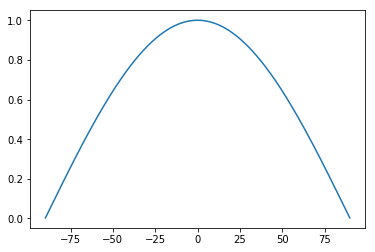

In [21]:
cosines=np.cos(np.radians(lats)) # convert lats in degrees to lats in radians and find the cosine of the latitude 
plt.plot(lats,cosines);

If we multiply the cosines by the number in each latitudinal bin and cast the value to an integer, we approximate the number we need to resample within that latitude band (here called **num\_resample**).

In [22]:
num_resample=(cosines*1081).astype(int)
print (num_resample)

[   3    9   15   22   28   34   40   47   53   59   65   72   78   84   91
   97  103  109  116  122  128  134  141  147  153  159  165  172  178  184
  190  196  203  209  215  221  227  233  240  246  252  258  264  270  276
  282  288  294  300  307  313  319  325  331  337  343  348  354  360  366
  372  378  384  390  396  402  407  413  419  425  431  436  442  448  453
  459  465  471  476  482  487  493  499  504  510  515  521  526  532  537
  543  548  554  559  564  570  575  580  586  591  596  601  607  612  617
  622  627  632  637  643  648  653  658  663  668  672  677  682  687  692
  697  702  706  711  716  720  725  730  734  739  744  748  753  757  762
  766  771  775  779  784  788  792  796  801  805  809  813  817  821  826
  830  834  838  842  845  849  853  857  861  865  868  872  876  880  883
  887  890  894  897  901  904  908  911  915  918  921  924  928  931  934
  937  940  943  946  950  952  955  958  961  964  967  970  972  975  978
  981  983  

So at the highest latidudes, we want to randomly select three of the elevation values and at the equator we take them all. At each latitude between the poles and the equator, we resample a number proportional to the area.   

Once we've calculated the number to re-sample in a particular latitude bin (**num\_resample**), we need to decide which of the 1081 elevations to re-sample. 

For a first pass, we'll just take $N$ randomly selected values. The **NumPy.random** module has a bunch of functions, including  **randint( )** which  generates an array of randomly selected indices. We can then select the elevations at these indices in the given latitude bin. 

First, let's import the module **numpy.random**.  You can learn about the **numpy.randint( )**  function by uncommenting the help line.  

In [23]:
from numpy import random
#help(random.randint)

Here's an example to get an array of 10 random integers between 0 and 1081

In [24]:
indices=random.randint(0, high=1081, size=10)
print (indices)

[128 542 957  19 570 406 346 940 347 772]


Let's put all these concepts  together and re-sample each latitude bin  so that each elevation represents the same percentage of Earth's surface.  

We'll create a container to put in our new elevation data and then fill it with our re-sampled data.


In [25]:
topo_resampled=[] # make a list to put elevations in
for lat_bin in range(540):  # step through all the latitudinal bins
    num=num_resample[lat_bin] # get the number to re-sample at this latidudinal bin
    lat_list=topo_km[lat_bin].tolist() # get the list of elevations in this bin
    for ind in random.randint(0,high=1080,size=num): # get the desired indices
        topo_resampled.append(lat_list[ind]) # append the selected elevation
print (len(topo_resampled)) # see how long topo_resampled is
print (540*1081) # compared to the original

371346
583740


We've reduced the number of elevations from the original 540x1081, to 371346 values.

Now that we've re-sampled our data, we can re-create the hypsometric curve as we did earlier:   

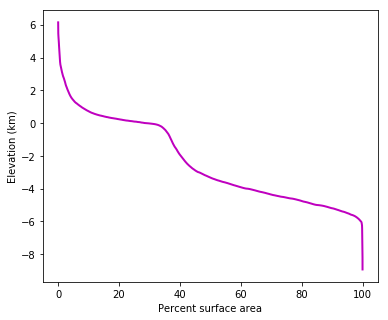

In [26]:
# sort the data by decreasing numbers
fig=plt.figure(2,(6,5))
topo_resampled_sorted=sorted(topo_resampled,reverse=True)
percent=[]
for k in range(len(topo_resampled_sorted)):
    percent.append(100.*float(k)/len(topo_resampled_sorted))
#convert from Fraction to percent

plt.plot(percent,topo_resampled_sorted,'m-',linewidth=2)
plt.xlabel('Percent surface area')
plt.ylabel('Elevation (km)');

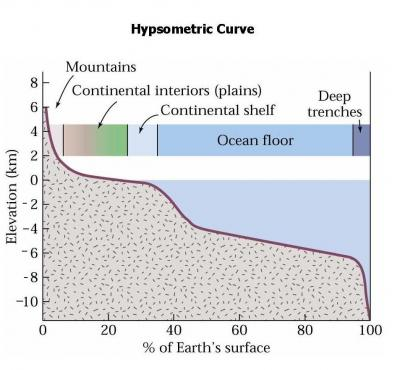

In [27]:
Image(filename='Figures/hypsometric.v2_400.jpg',width=600)

Pretty good!

### Assignment #5

Problem 5.1:

Surface temperatures are estimated by NASA satellites and prepared as data products that you can download from the website http://search.earthdata.nasa.gov 

The datafile ./Datasets/SurfaceTemp/surfaceTemperature.csv has 
global surface temperature data that was recorded during the day over an 8 day period in 2006 by the MODIS satellite.
- Take a peek at the data
- Import the  data into a pandas DataFrame
- Use the method **DataFrame.dropna( )** to remove all the Nan values.
- Sort the data
- Plot the global surface temperature across the globe as a histogram
- Generate a cumulative distribution function of temperature across the globe

Problem 5.2:

- Read the data file "Datasets/NAVDAT/NAVDAT.csv" into a pandas DataFrame
- Find all the igneous units with ages less than 23 Ma (Neogene).
- San Diego is located at: (33,-117)
- Calculate the great circle distance from San Diego to every Neogene igneous unit. 
- Calculate the distance to the nearest Neogene igneous unit. 
- Print out the distance in km with one significant figure. Hint: Use **map( )** and **reduce( )**.

